In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [9]:
# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select features and target
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked"]].copy()
y = df["Survived"]

In [15]:
# Handle missing values
X["Age"] = X["Age"].fillna(X["Age"].median())  
X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0]) 

In [16]:
# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
X["Sex"] = le_sex.fit_transform(X["Sex"])
X["Embarked"] = le_embarked.fit_transform(X["Embarked"])

In [17]:
# Check if there are any missing values after filling
print("Missing values in X after filling:", X.isnull().sum())

Missing values in X after filling: Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


In [18]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Handle any remaining missing values in X_train and X_test
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

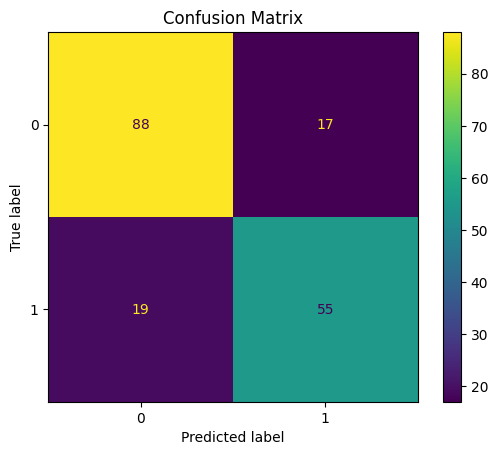

In [23]:
# 1. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("Confusion Matrix")
plt.show()

In [24]:
# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [25]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

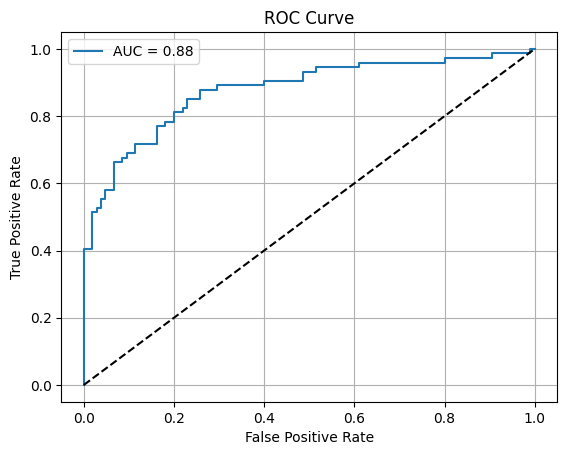

In [26]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()